# Week1-a 量子回路における加算器
この週では、まず、量子回路を用いて単純な古典計算(加算)を行います。

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

IBMQ.load_account()

//anaconda3/envs/qiskit023_2/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# ラーニング演習 I-A
全加算器は、下の位からの桁上げを含む加算器である。
全加算器を量子回路で表現し、

$A=1$, $B=0$, $X=1$

の時の結果を出力せよ。なお、真理値表は以下のようになる。

|入力A|入力B|桁上げ入力X|桁上げ出力C|出力S|
|--|--|--|--|--|
|0|0|0|0|0|
|0|0|1|0|1|
|0|1|0|0|1|
|0|1|1|1|0|
|1|0|0|0|1|
|1|0|1|1|0|
|1|1|0|1|0|
|1|1|1|1|1|

なお、量子レジスタをq, 古典レジスタcとする。また、入力A, B, 桁上げ入力Xをそれぞれq[0], q[1], q[2]に与えられるものとし、測定結果のc[0]に出力S、c[1]に桁上げ出力Cが出力されるようにすること。

# 解答例

半加算器２つとORを使うことで全加算器を実装することができます。

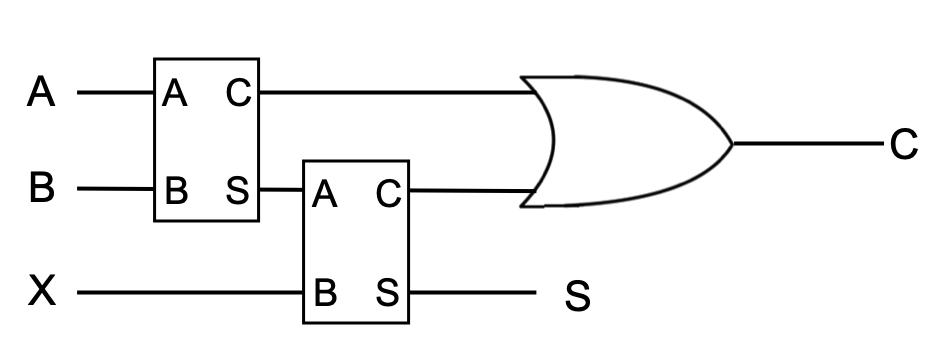

In [2]:
from IPython.display import Image, display
Image('adder.png')

{'10': 1000}


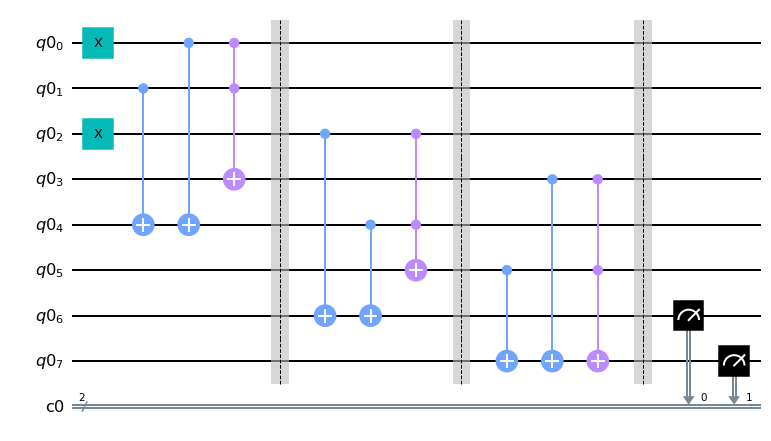

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

##### ここに量子回路を作成してください。

# 各レジスター、量子回路を宣言
q = QuantumRegister(8)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

# 入力データを入れます
qc.x(0)
qc.x(2)

# 量子回路を作成
def OR(a,b,c):
    qc.cx(q[b], q[c])
    qc.cx(q[a], q[c])
    qc.ccx(q[a], q[b], q[c])
    
def hadder(a,b,s,c):
    #XOR
    qc.cx(q[b], q[s])
    qc.cx(q[a], q[s])
    #AND
    qc.ccx(q[a], q[b], q[c])
    
hadder(0,1,4,3)
qc.barrier(q)
hadder(4,2,6,5)
qc.barrier(q)
OR(3,5,7)
qc.barrier(q)

#観測
qc.measure(q[6], c[0])
qc.measure(q[7], c[1])

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')